# **Pengaruh Perilaku Siswa terhadap Nilai Ujian**
## 🔑**Latar Belakang**

Pendidikan merupakan fase penting yang harus dilalui oleh setiap manusia. Melalui pendidikan, siswa mengembangkan pengetahuan dan kemampuan kognitifnya. Namun manusia tidak hanya hidup dalam satu dimensi saja, banyak dimensi yang saling berkaitan dengan kehidupan mereka, seperti sosial, ekonomi, psikologi. Perubahan dalam dimensi-dimensi tersebut sedikit-banyak akan mempengaruhi dimensi yang lain. Sehingga menarik untuk dianalisis secara statistik, perubahan dalam dimensi apa saja yang secara signifikan mempengaruhi pendidikan seorang siswa, dalam analisis ini menggunakan nilai ujian sebagai acuan.

## 🎯**Tujuan Analisis**

Tujuan dalam analisis ini adalah untuk mengetahui faktor yang mempengaruhi hasil belajar siswa 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


## 🛠**Pra-pemrosesan Data**

Sebelum menganalisis lebih lanjut, kita harus mengetahui struktur dan informasi dari data mentah yang kita punya. Data mentah tidak bisa langusng kita olah karena ada kemungkinan error dalam proses input data. Sehingga kita harus tahu struktur data mentah kita, membersihkan dari data yang *corrupt*, misal nilainya yang hilang.

In [2]:
df= pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')

Dalam mulai menganalisis kita perlu tahu struktur data yang kita punya. Mulai dari kolom yang dimuat data, informasi yang ada -termasuk jenis data, nilai yang hilang, dan jumlah kolom-, nilai unik pada setiap kolom - hal ini penting terutama dalam data kategorikal.

In [3]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.nunique()

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

Di sini saya memisahkan kolom numerik dan kategorik untuk memudahkan dalam pengujian yang akan dilakukan.

In [6]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

print("Kolom Numerik:", list(numerical_cols))
print("Kolom Kategorikal:", list(categorical_cols))

Kolom Numerik: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Kolom Kategorikal: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


### 🧹**Membersihkan nilai yang hilang**

Kolom `parental_education_level` terdapat **91 baris** nilainya hilang. Dari, data di bawah, diperoleh bahwa `parental_education_level` tidak memiliki data yang dominan. Modus dari kolom tersebut adalah **High School (39.2%)** namun ini tidak cukup dominan diantara nilai **Banchelor (35%)** dan **Master (16.7%)** sehingga saya memutuskan untuk tidak mengganti dengan modus yang ada. Tidak juga dengan menghapus data yang kolom `parental_education_level` karena nilai yang hilang hanya dalam 1 kolom dan akan kehilangan data yang lain. Keputusannya saya buat kategori baru `Unknown` dalam kolom `parental_education_level` sebagai ganti dari nilai yang hilang.

In [7]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
counts = df['parental_education_level'].value_counts(dropna=False)
percentages = df['parental_education_level'].value_counts(normalize=True, dropna=False) * 100
result = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
print(result)

                          Count  Percentage (%)
parental_education_level                       
High School                 392            39.2
Bachelor                    350            35.0
Master                      167            16.7
NaN                          91             9.1


In [9]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

In [10]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [11]:
counts = df['parental_education_level'].value_counts(dropna=False)
percentages = df['parental_education_level'].value_counts(normalize=True, dropna=False) * 100
result = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
print(result)

                          Count  Percentage (%)
parental_education_level                       
High School                 392            39.2
Bachelor                    350            35.0
Master                      167            16.7
Unknown                      91             9.1


In [12]:
df.duplicated().sum()

0

In [13]:
for col in categorical_cols:
    if col == 'student_id':
        continue
    print(f"{col}:")
    print(df[col].unique())
    print("\n")

gender:
['Female' 'Male' 'Other']


part_time_job:
['No' 'Yes']


diet_quality:
['Fair' 'Good' 'Poor']


parental_education_level:
['Master' 'High School' 'Bachelor' 'Unknown']


internet_quality:
['Average' 'Poor' 'Good']


extracurricular_participation:
['Yes' 'No']




## 🚀**Analisis Eksplorasi Data (EDA)**
  
Pada bagian ini akan dimulai dengan melihat nilai korelasi antar variabel numerik melalui heatmap

In [39]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

print('--- Plotly Version ---')

corr = df[numerical_cols].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
pio.templates.default = "plotly_white"

data = go.Heatmap(
    z=corr.mask(mask),
    x=corr.columns,
    y=corr.columns,
    colorscale=px.colors.sequential.Magma,
    zmin=-1,
    zmax=1,
    text=corr.mask(mask),  
    texttemplate="%{text}",
    hoverinfo="x+y+z",
    name="Correlation Matrix",
)

fig = go.Figure(data=data)

fig.update_layout(
    title='Heatmap Korelasi Antar Variabel Numerik',
    yaxis=dict(autorange='reversed'), 
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

--- Plotly Version ---


--- Plotly Version ---


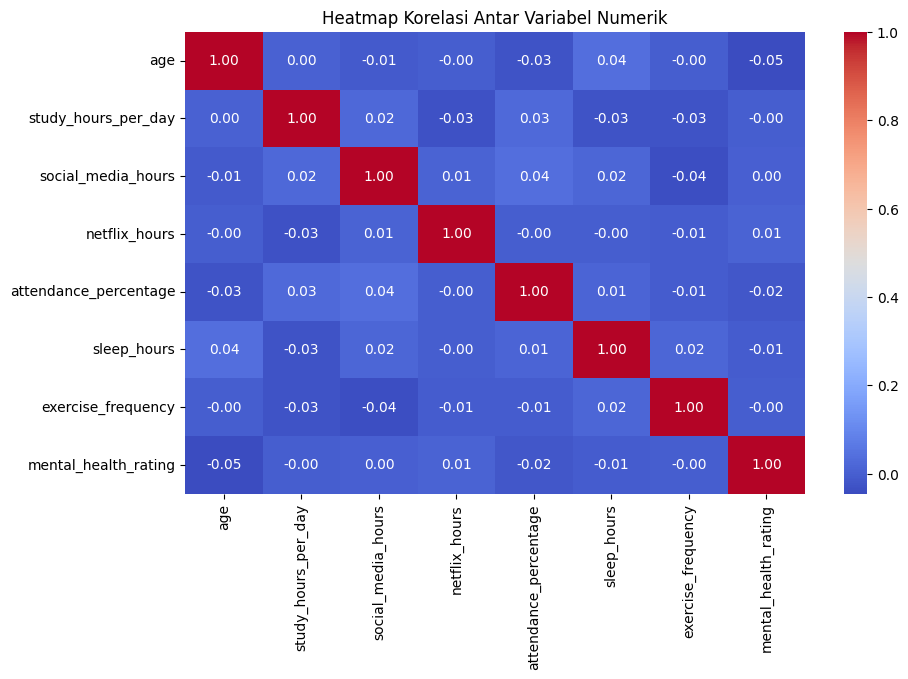

In [34]:
print('--- Matplolib dan Seaborn Version ---')
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

### **Analisis Korelasi**

#### Kolerelasi Exam Score dengan Variabel dependen

Ini adalah fokus utama kita karena `exam_score` adalah variabel dependen (hasil) yang ingin kita pahami. Lihat baris dan kolom paling bawah/kanan yang berlabel `exam_score`.

* **study_hours_per_day & exam_score** memiliki nilai korelasi positif yang sangat kuat, yakni **0.83**. Ini menunjukkan bahwa semakin banyak jam belajar per hari seorang siswa, cenderung semakin tinggi nilai ujian mereka. Ini adalah temuan paling signifikan dan paling dapat diprediksi dari data ini

* **mental_health_rating & exam_score** memiliki nilai korelasi positif yang moderat, yakni **0.32**. Ini menunjukkan bahwa kesehatan mental siswa yang memiliki rating lebih baik akan cenderung memiliki nilai ujian yang sedikit lebih tinggi. Meskipun tidak sekuat jam belajar, kesehatan mental siswa tetap memiliki pengaruh positif.

* **sleep_hours & exam_score** memiliki nilai korelasi positif yang lemah, yakni **0.12**. Ini menunjukkan siswa yang memiliki tidur lebih banyak mendapatkan nilai yang sedikit lebih tinggi tapi hubungannya tidak signifikan.

* **exercise_frequency & exam_score**, sama dengan sleep_hour & exam_score, memiliki nilai korelasi positif yang lemah, yakni **0.16**. Artinya lebih sering siswa berolahraga mungkin sedikit lebih baik dalam ujian.

* **social_media_hours & exam_score** memiliki nilai korelasi negatif yang lemah, yakni **-0.17**. Ini menunjukkan bahwa semakin sedikit menghabiskan waktu di sosial media, siswa cenderung memiliki nilai ujian yang sedikit lebih tinggi. Meskipun tidak signifikan. 

* **netflix_hours & exam_score**, sama dengan sosial media, memiliki nilai korelasi negatif yang lemah, yakni **-0.17**. Ini menunjukkan bahwa semakin sedikit waktu yang dikonsusmsi siswa untuk netflix, siswa cenderung memiliki nilai ujian yang sedikit lebih tinggi. Meskipun tidak signifikan.

* **attendance_percentage & exam_score** memiliki korelasi positif yang sangat lemah, yaitu **0.09**. Ini menunjukkan persentase kehadiran (tanpa melihat kualitas kehadiran) dalam kelas memiliki epngaruh yang sangat kecil, hampir tidak signifikan, terhadap nilai ujian. 

### **Antar Variabel Prediktor (Non-Exam Score):**
Meskipun tidak langsung memengaruhi nilai ujian, korelasi antar variabel prediktor ini penting untuk memahami interaksi antar kebiasaan siswa dan dapat mengidentifikasi masalah multikolinearitas dalam pemodelan.

Dari heatmap di atas, hubungan antar variabel prediktor cenderung mendekati nol. Artinya **tidak ada korelasi** yang signifikan antar variabel prediktor.

### **Kesimpulan**
1. **Jam Belajar adalah Faktor Dominan:** Variabel `study_hours_per_day` adalah prediktor tunggal terkuat untuk `exam_score`. Ini menunjukkan bahwa dari kebiasaan yang diukur, waktu yang diinvestasikan dalam belajar memiliki dampak paling besar pada kinerja akademik.
2. **Pengaruh Moderat dari Kesehatan Mental:** Kesehatan mental memiliki korelasi positif yang moderat dengan nilai ujian, menunjukkan pentingnya kesejahteraan mental siswa.
3. **Pengaruh Lemah dari Kebiasaan Lain:** Jam tidur, frekuensi olahraga, penggunaan media sosial, dan waktu Netflix memiliki pengaruh yang sangat lemah atau minimal terhadap nilai ujian.
4. **Kehadiran Kelas Tidak Signifikan:** Dalam dataset ini, persentase kehadiran di kelas tidak menunjukkan korelasi yang signifikan dengan nilai ujian. Ini bisa menjadi poin diskusi menarik atau memerlukan analisis lebih lanjut dengan variabel lain.
5. **Independensi Kebiasaan:** Sebagian besar kebiasaan siswa (selain `study_hours_per_day` dan `exam_score`) tampak relatif independen satu sama lain, artinya peningkatan di satu area (misalnya, tidur) tidak secara otomatis berkorelasi dengan peningkatan atau penurunan di area lain (misalnya, penggunaan media sosial).

Selanjutnya kita akan eksplorasi dataset ini lebih lanjut. Di bawah ini, akan disajikan: 
* Scatter plot antara nilai ujian dan jam belajar harian
* Distribusi nilai ujian berdasarkan kategori kesehatan mental

In [16]:
fig = px.scatter(
    df,
    x='study_hours_per_day',
    y='exam_score',
    color='gender',
    opacity=0.7,
    size_max=10,
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='Hubungan antara Jam Belajar Harian dan Nilai Ujian'
)

# Add regression line (for all data combined)
fig.add_traces(
    px.scatter(
        df, 
        x='study_hours_per_day', 
        y='exam_score', 
        trendline="ols",
        trendline_color_override='red'
    ).data[1] 
)

# Customize the regression line appearance
fig.data[1].update(
    line=dict(dash='dash', width=2),
    name='Garis Tren',
    showlegend=True
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Jam Belajar Per Hari',
    yaxis_title='Nilai Ujian',
    legend_title='Gender',
    plot_bgcolor='white',
    hovermode='closest',
    font=dict(size=12),
    title_font_size=16
)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

fig.show()

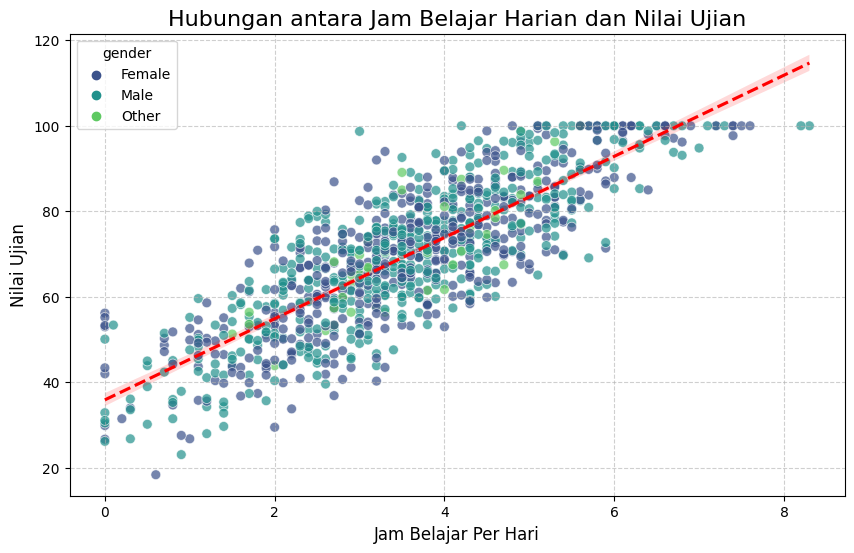

In [17]:
plt.figure(figsize=(10, 6)) # Mengatur ukuran plot untuk tampilan yang lebih baik

sns.scatterplot(
    data=df,
    x='study_hours_per_day',
    y='exam_score',
    alpha=0.7,
    s=50,
    hue='gender',
    palette='viridis'
)

# Menambahkan garis regresi linier (garis tren)
sns.regplot(
    data=df,
    x='study_hours_per_day',
    y='exam_score',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

plt.title('Hubungan antara Jam Belajar Harian dan Nilai Ujian', fontsize=16)
plt.xlabel('Jam Belajar Per Hari', fontsize=12)
plt.ylabel('Nilai Ujian', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Analisis Scatter Plot: Hubungan antara jam belajar harian dan nilai ujian**
1. **Hubungan Positif yang Kuat**:
Terlihat jelas adanya hubungan positif yang kuat antara jam belajar per hari dan nilai ujian. Seiring dengan peningkatan Jam Belajar Per Hari, "Nilai Ujian" cenderung meningkat pula. Ini ditunjukkan oleh kumpulan titik data yang condong ke atas dan ke kanan.
Garis regresi linier berwarna merah yang miring ke atas mengkonfirmasi tren positif ini secara visual.
2. **Korelasi Tinggi yang Terkonfirmasi**:
Visualisasi ini secara konsisten mendukung nilai koefisien korelasi Pearson sebesar 0.83 antara `study_hours_per_day` dan `exam_score` yang terlihat pada heatmap korelasi. Korelasi yang mendekati 1 ini menunjukkan hubungan linier positif yang sangat kuat.
3. **Variabilitas dan Sebaran Data**:
Meskipun trennya jelas, ada variabilitas dalam nilai ujian untuk setiap rentang jam belajar tertentu. Artinya, tidak semua siswa yang belajar dalam jumlah jam yang sama mendapatkan nilai ujian yang persis sama. Ada siswa dengan jam belajar rendah yang mendapatkan nilai relatif tinggi, dan sebaliknya, meskipun ini adalah minoritas.
Sebaran titik-titik data di sekitar garis regresi menunjukkan bahwa, meskipun jam belajar adalah prediktor yang kuat, ada faktor-faktor lain yang juga memengaruhi nilai ujian.
4. **Pengaruh Gender (Observasi Awal)**:
Warna titik-titik (Female, Male, Other) memungkinkan observasi awal mengenai bagaimana gender tersebar dalam hubungan ini.
Secara kasat mata, tidak ada indikasi yang jelas bahwa satu gender tertentu secara signifikan lebih baik atau lebih buruk dalam memanfaatkan jam belajar mereka dibandingkan gender lain. Semua kelompok gender tampaknya tersebar merata di sepanjang tren positif ini. Ini menunjukkan bahwa hubungan antara jam belajar dan nilai ujian cenderung konsisten lintas gender.

**Kesimpulan**

Scatter plot ini memberikan bukti visual yang sangat kuat bahwa jam belajar harian adalah **pendorong utama** kinerja akademik siswa. Hubungan ini **sangat linier dan positif**, mengindikasikan bahwa semakin banyak siswa belajar, semakin tinggi nilai ujian yang cenderung mereka dapatkan. Meskipun ada variabilitas yang dijelaskan oleh faktor-faktor lain, jam belajar adalah faktor yang paling menonjol.

In [18]:
# Create bins and labels
bins = [df['mental_health_rating'].min() - 1, 2, 4, df['mental_health_rating'].max() + 1]
labels = ['Rendah', 'Sedang', 'Tinggi']

# Create new category column
df['mental_health_category'] = pd.cut(df['mental_health_rating'], bins=bins, labels=labels, ordered=True)

# Create the box plot
fig = px.box(
    df,
    x='mental_health_category',
    y='exam_score',
    color='mental_health_category',
    category_orders={'mental_health_category': labels},  # Ensure correct order
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Pastel color scheme
    title='Distribusi Nilai Ujian Berdasarkan Kategori Kesehatan Mental'
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Kategori Kesehatan Mental',
    yaxis_title='Nilai Ujian',
    plot_bgcolor='white',
    font=dict(size=12),
    title_font_size=16,
    showlegend=False  # Since categories are already on x-axis
)

# Add horizontal grid lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray',
    zeroline=False
)

# Display the plot
fig.show()

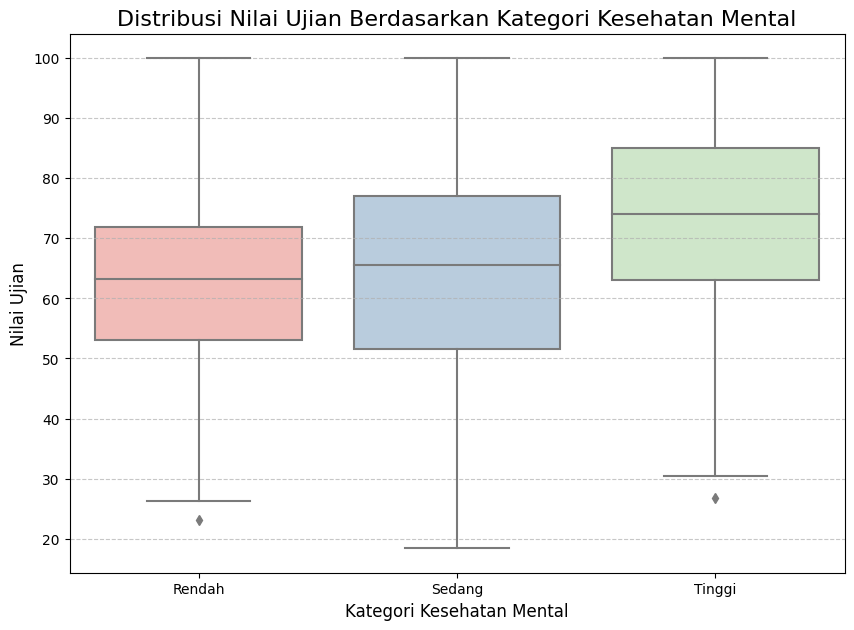


Rata-rata Nilai Ujian per Kategori Kesehatan Mental:
mental_health_category
Rendah    62.872449
Sedang    65.094419
Tinggi    73.485908
Name: exam_score, dtype: float64


In [19]:
# --- Membuat Box Plot ---
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df,
    x='mental_health_category',
    y='exam_score',
    palette='Pastel1', # Skema warna
    order=labels # Pastikan urutan kategori sesuai keinginan
)

plt.title('Distribusi Nilai Ujian Berdasarkan Kategori Kesehatan Mental', fontsize=16)
plt.xlabel('Kategori Kesehatan Mental', fontsize=12)
plt.ylabel('Nilai Ujian', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nRata-rata Nilai Ujian per Kategori Kesehatan Mental:")
print(df.groupby('mental_health_category')['exam_score'].mean())

### **Analisis Box Plot: Distribusi Nilai Ujian Berdasarkan Kategori Kesehatan Mental**
1. **Tren Peningkatan Median Nilai Ujian:**
    * Kesehatan Mental Rendah (Merah Muda): Median nilai ujian (garis tengah dalam kotak) berada di sekitar 64-65.
    * Kesehatan Mental Sedang (Biru Muda): Median nilai ujian sedikit meningkat, berada di sekitar 66-67.
    * Kesehatan Mental Tinggi (Hijau Muda): Median nilai ujian menunjukkan peningkatan yang lebih signifikan, berada di sekitar 74-75.
    * Analisis: Terlihat jelas ada tren positif: semakin tinggi kategori kesehatan mental siswa, semakin tinggi median nilai ujian mereka.

2. **Rentang Interkuartil (IQR - Kotak):**
    * Kesehatan Mental Rendah: IQR (tinggi kotak) menunjukkan bahwa sebagian besar nilai ujian berada di rentang sekitar 52 hingga 71.
    * Kesehatan Mental Sedang: IQR berada di rentang sekitar 55 hingga 77.
    * Kesehatan Mental Tinggi: IQR berada di rentang sekitar 64 hingga 86.
    * Analisis: Kotak untuk kategori Tinggi berada pada rentang nilai ujian yang lebih tinggi dan sedikit lebih lebar dibandingkan Rendah dan Sedang.

3. **Rentang Data Keseluruhan (Whiskers) dan Outlier:**
    * Kesehatan Mental Rendah: Rentang nilai ujian cukup lebar, dari sekitar 20-an hingga 100, dengan beberapa outlier di bagian bawah (nilai sangat rendah).
    * Kesehatan Mental Sedang: Rentang nilai juga luas, dari sekitar 18 hingga 100, dengan beberapa outlier di bagian bawah.
    * Kesehatan Mental Tinggi: Rentang nilai dari sekitar 27 hingga 100, dengan satu outlier di bagian bawah.
    * Analisis: Semua kategori menunjukkan sebaran nilai yang luas, dengan siswa di setiap kategori bisa mendapatkan nilai rendah maupun tinggi. Namun, konsentrasi nilai yang lebih tinggi berada pada kategori kesehatan mental yang lebih baik. Adanya outlier di bagian bawah untuk semua kategori menunjukkan ada beberapa siswa dengan kesehatan mental baik pun bisa mendapatkan nilai yang sangat rendah, atau sebaliknya.

#### **Kesimpulan**

Box plot ini secara efektif memvisualisasikan bahwa kesehatan mental siswa memiliki hubungan positif dengan kinerja akademik mereka, di mana siswa dengan kategori kesehatan mental yang lebih baik cenderung mendapatkan nilai ujian yang lebih tinggi.

## 🧪**Uji Hipotesis & Uji Statistik**

Dalam bagian ini, akan dilakukan uji Korelasi dan uji ANOVA. Namun sebelum itu saya ingin menyajikan plot untuk melihat *skewness* (kemiringan) distribusi dataset. Ini penting untuk deteksi outlier dan risiko, pertimbangan dalam pemilihan model statistik, pemahaman data dan kualitas data itu sendiri

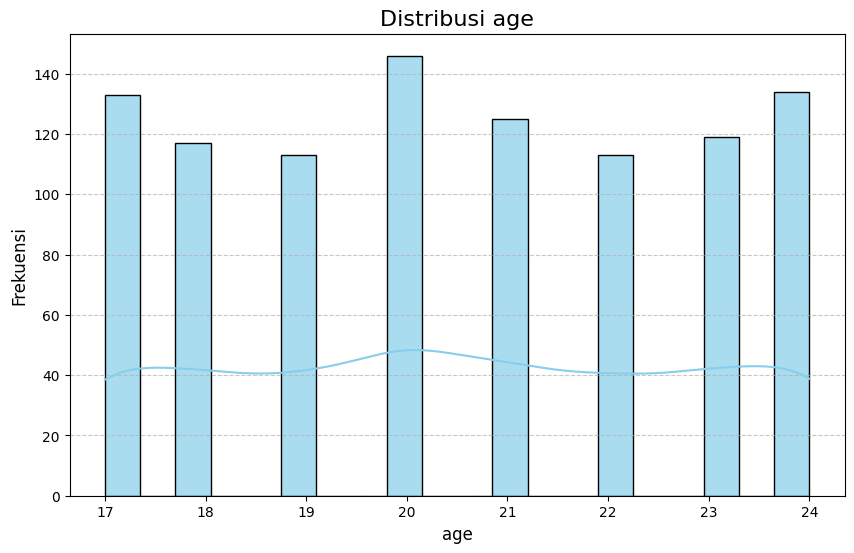

Statistik untuk 'age':
  Skewness: 0.008
  Kurtosis: -1.219
  Skewness: Mendekati simetris.
  Kurtosis: Negatif (Platykurtic - puncak datar, ekor tipis).
--------------------------------------------------


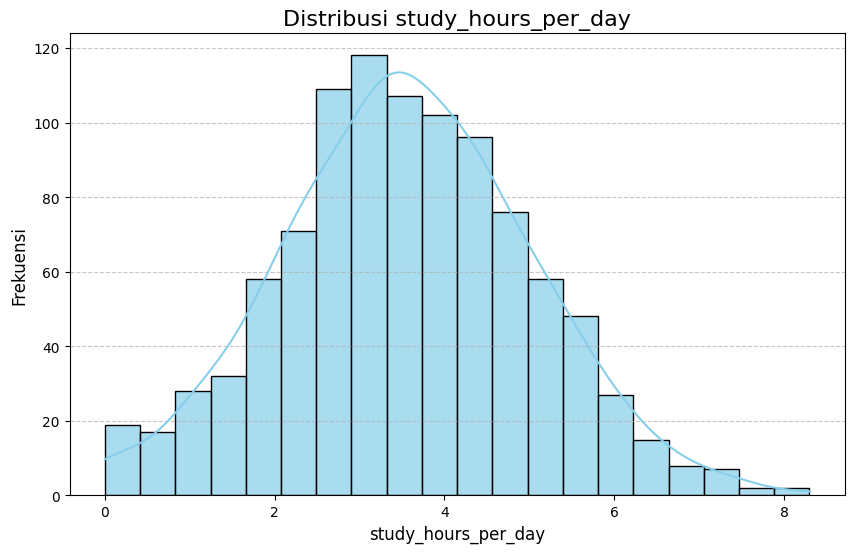

Statistik untuk 'study_hours_per_day':
  Skewness: 0.054
  Kurtosis: -0.061
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


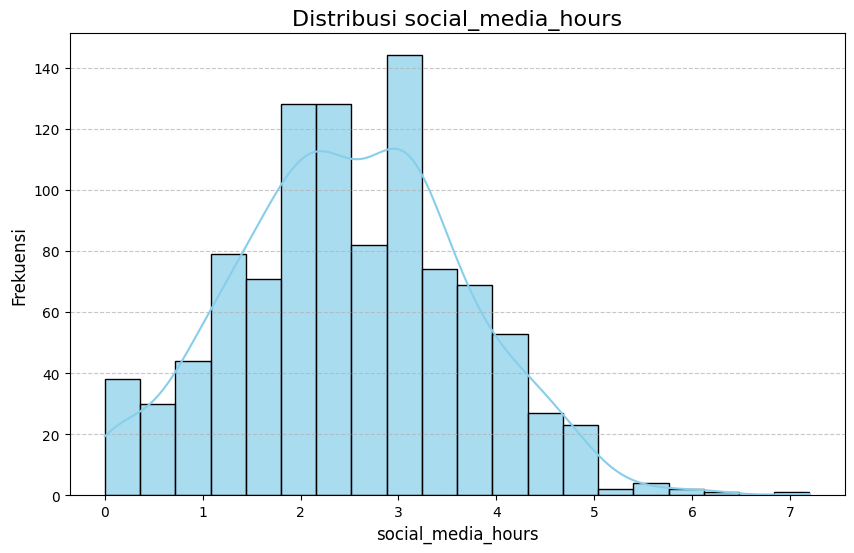

Statistik untuk 'social_media_hours':
  Skewness: 0.120
  Kurtosis: -0.100
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


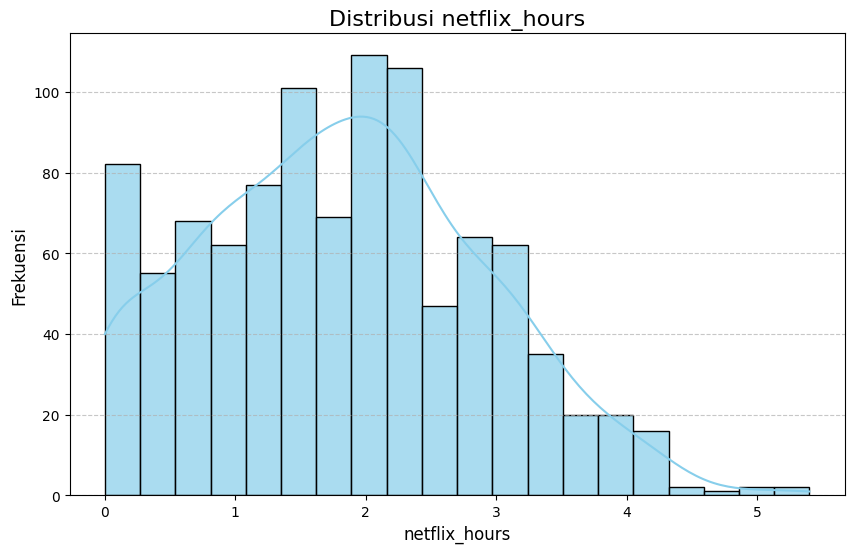

Statistik untuk 'netflix_hours':
  Skewness: 0.237
  Kurtosis: -0.437
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


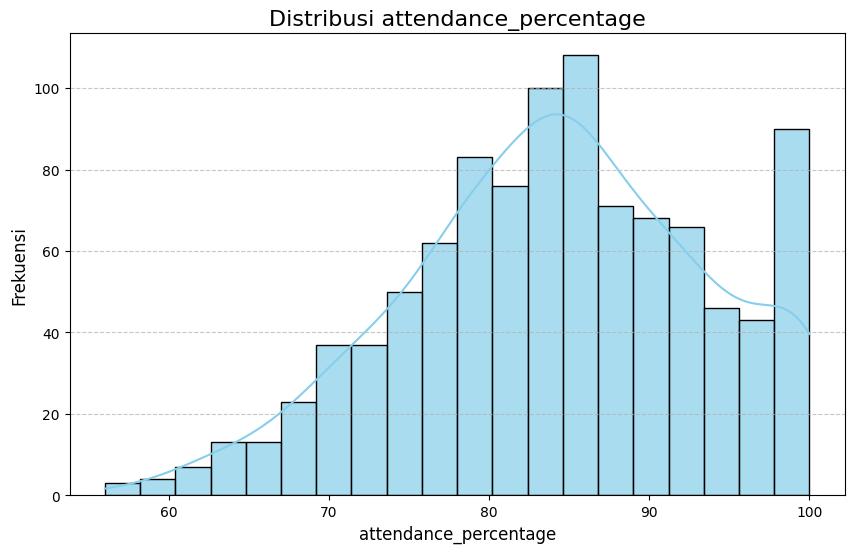

Statistik untuk 'attendance_percentage':
  Skewness: -0.237
  Kurtosis: -0.395
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


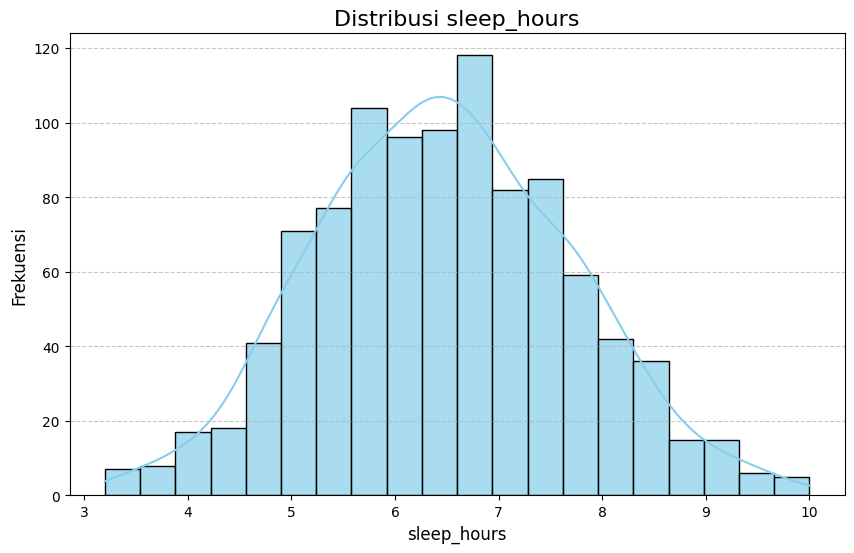

Statistik untuk 'sleep_hours':
  Skewness: 0.091
  Kurtosis: -0.219
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


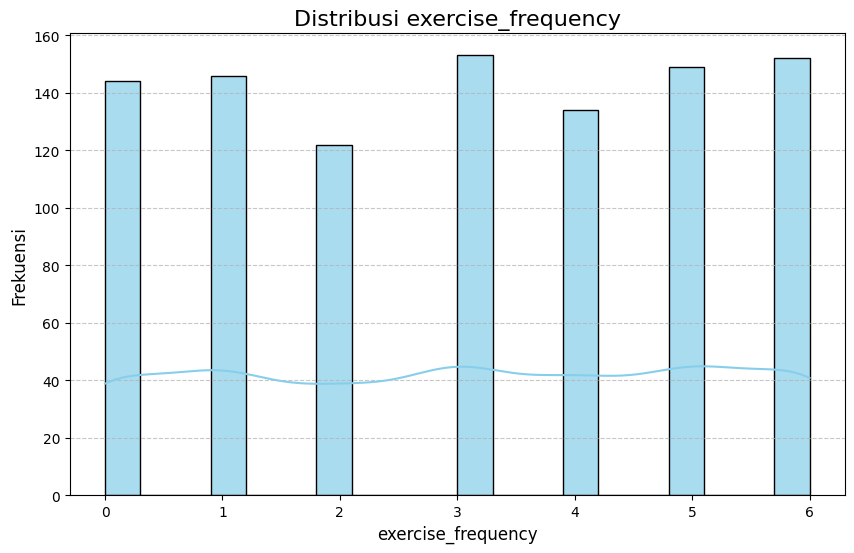

Statistik untuk 'exercise_frequency':
  Skewness: -0.032
  Kurtosis: -1.276
  Skewness: Mendekati simetris.
  Kurtosis: Negatif (Platykurtic - puncak datar, ekor tipis).
--------------------------------------------------


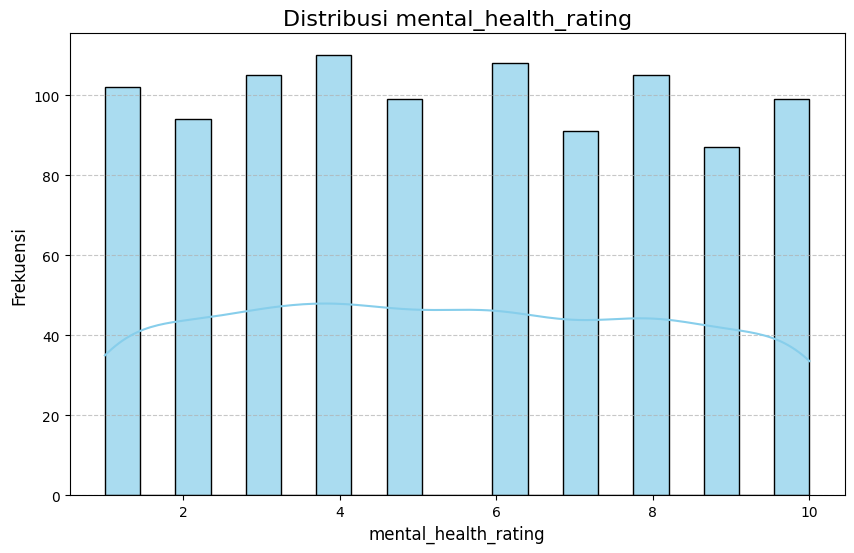

Statistik untuk 'mental_health_rating':
  Skewness: 0.038
  Kurtosis: -1.189
  Skewness: Mendekati simetris.
  Kurtosis: Negatif (Platykurtic - puncak datar, ekor tipis).
--------------------------------------------------


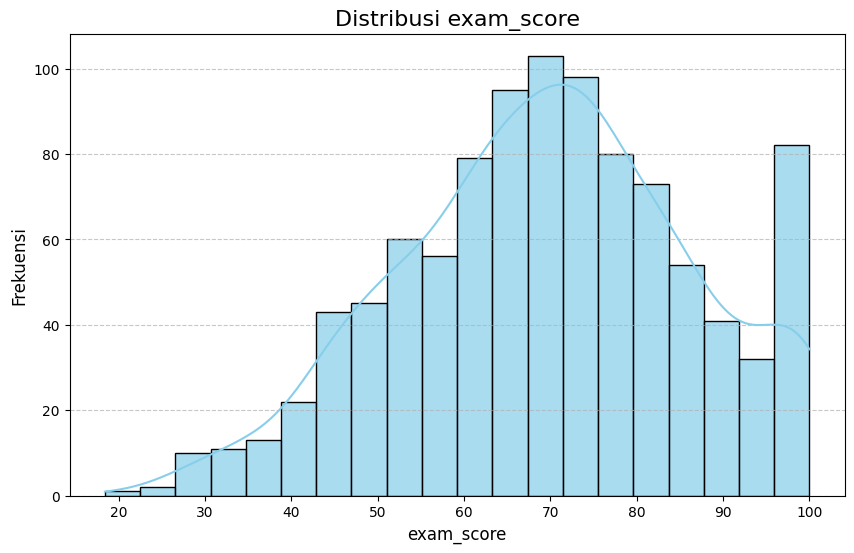

Statistik untuk 'exam_score':
  Skewness: -0.156
  Kurtosis: -0.424
  Skewness: Mendekati simetris.
  Kurtosis: Mendekati normal (mesokurtic).
--------------------------------------------------


In [20]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    # Gabungkan Histogram dan KDE Plot
    sns.histplot(
        data=df,
        x=col,
        kde=True, # Menampilkan KDE plot
        bins=20,  # Jumlah bins, bisa disesuaikan
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )

    plt.title(f'Distribusi {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Hitung Skewness dan Kurtosis
    col_skewness = skew(df[col].dropna()) # .dropna() untuk menangani missing values jika ada
    col_kurtosis = kurtosis(df[col].dropna())

    print(f"Statistik untuk '{col}':")
    print(f"  Skewness: {col_skewness:.3f}")
    print(f"  Kurtosis: {col_kurtosis:.3f}")

    # Interpretasi Skewness dan Kurtosis (panduan umum)
    if abs(col_skewness) < 0.5:
        print("  Skewness: Mendekati simetris.")
    elif col_skewness > 0:
        print("  Skewness: Positif (Ekor ke Kanan).")
    else:
        print("  Skewness: Negatif (Ekor ke Kiri).")

    if abs(col_kurtosis) < 0.5:
        print("  Kurtosis: Mendekati normal (mesokurtic).")
    elif col_kurtosis > 0:
        print("  Kurtosis: Positif (Leptokurtic - puncak tajam, ekor tebal).")
    else:
        print("  Kurtosis: Negatif (Platykurtic - puncak datar, ekor tipis).")
    print("-" * 50)

dari informasi di atas, didapatkan bahwa skewness dan kurtosis dari dataset cenderung datar dan mendekati simetris.

Selanjutnya Uji Korelasi Pearson. Ada empat hal yang akan diuji:
1. Uji Korelasi 1: exam_score vs. study_hours_per_day
2. Uji Korelasi 2: exam_score vs. mental_health_rating
3. Uji Korelasi 3: exam_score vs. netflix_hours
4. Uji Korelasi 4: exam_score vs. social_media_hours

### **Konsep Uji Hipotesis**
* Hipotesis Nol (H0): Tidak ada korelasi linier yang signifikan antara kedua variabel dalam populasi (koefisien korelasi populasi ρ=0).
* Hipotesis Alternatif (H1): Ada korelasi linier yang signifikan antara kedua variabel dalam populasi (koefisien korelasi populasi ρ=0).
*. Tingkat Signifikansi (α): Kita akan menetapkan tingkat signifikansi, yang umum digunakan adalah α=0.05. Ini berarti kita bersedia menerima peluang 5% untuk membuat kesalahan Tipe I (menolak H0 padahal H0 benar).

#### Aturan Keputusan:
* Jika p-value < α, kita menolak Hipotesis Nol (H0). Ini berarti korelasi yang diamati signifikan secara statistik.
* Jika p-value ≥α, kita gagal menolak Hipotesis Nol (H0). Ini berarti korelasi yang diamati tidak signifikan secara statistik (bisa jadi hanya kebetulan).


In [21]:
# --- Uji Korelasi 1: exam_score vs. study_hours_per_day ---
print("--- Uji Korelasi: exam_score vs. study_hours_per_day ---")
corr_study_exam, p_value_study_exam = pearsonr(df['study_hours_per_day'], df['exam_score'])

print(f"Koefisien Korelasi Pearson (r): {corr_study_exam:.3f}")
print(f"P-value: {p_value_study_exam:.3e}") # Menggunakan notasi ilmiah untuk p-value yang sangat kecil

alpha = 0.05
if p_value_study_exam < alpha:
    print(f"P-value ({p_value_study_exam:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada korelasi positif yang sangat signifikan secara statistik antara jam belajar harian dan nilai ujian.")
else:
    print(f"P-value ({p_value_study_exam:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada korelasi yang signifikan secara statistik antara jam belajar harian dan nilai ujian.")

print("\n" + "="*60 + "\n") # Pemisah

# --- Uji Korelasi 2: exam_score vs. mental_health_rating ---
print("--- Uji Korelasi: exam_score vs. mental_health_rating ---")
corr_mental_exam, p_value_mental_exam = pearsonr(df['mental_health_rating'], df['exam_score'])

print(f"Koefisien Korelasi Pearson (r): {corr_mental_exam:.3f}")
print(f"P-value: {p_value_mental_exam:.3e}")

if p_value_mental_exam < alpha:
    print(f"P-value ({p_value_mental_exam:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada korelasi positif yang signifikan secara statistik antara penilaian kesehatan mental dan nilai ujian.")
else:
    print(f"P-value ({p_value_mental_exam:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada korelasi yang signifikan secara statistik antara penilaian kesehatan mental dan nilai ujian.")

--- Uji Korelasi: exam_score vs. study_hours_per_day ---
Koefisien Korelasi Pearson (r): 0.825
P-value: 4.596e-250
P-value (4.596e-250) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada korelasi positif yang sangat signifikan secara statistik antara jam belajar harian dan nilai ujian.


--- Uji Korelasi: exam_score vs. mental_health_rating ---
Koefisien Korelasi Pearson (r): 0.322
P-value: 1.753e-25
P-value (1.753e-25) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada korelasi positif yang signifikan secara statistik antara penilaian kesehatan mental dan nilai ujian.


* **Uji Korelasi `exam_score` vs. `study_hours_per_day`**
    * Koefisien Korelasi Pearson (r): 0.825
    * P-value: 4.596e-250
    * P-value (4.596e-250) < alpha (0.05), sehingga MENOLAK H0.
    * Kesimpulan: Ada korelasi positif yang sangat signifikan secara statistik antara jam belajar harian dan nilai ujian.

* **Uji Korelasi: `exam_score` vs. `mental_health_rating`**
    * Koefisien Korelasi Pearson (r): 0.322
    * P-value: 1.753e-25
    * P-value (1.753e-25) < alpha (0.05), sehingga MENOLAK H0.
    * Kesimpulan: Ada korelasi positif yang signifikan secara statistik antara penilaian kesehatan mental dan nilai ujian.

In [22]:
# --- Uji Korelasi 3: exam_score vs. netflix_hours ---
print("--- Uji Korelasi: exam_score vs. netflix_hours ---")
corr_netflix_exam, p_value_netflix_exam = pearsonr(df['netflix_hours'], df['exam_score'])

print(f"Koefisien Korelasi Pearson (r): {corr_netflix_exam:.3f}")
print(f"P-value: {p_value_netflix_exam:.3e}")

if p_value_netflix_exam < alpha:
    print(f"P-value ({p_value_netflix_exam:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam Netflix harian dan nilai ujian.")
    print("Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.")
else:
    print(f"P-value ({p_value_netflix_exam:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada korelasi yang signifikan secara statistik antara jam Netflix harian dan nilai ujian.")

print("\n" + "="*60 + "\n") # Pemisah

# --- Uji Korelasi 4: exam_score vs. social_media_hours ---
print("--- Uji Korelasi: exam_score vs. social_media_hours ---")
corr_social_exam, p_value_social_exam = pearsonr(df['social_media_hours'], df['exam_score'])

print(f"Koefisien Korelasi Pearson (r): {corr_social_exam:.3f}")
print(f"P-value: {p_value_social_exam:.3e}")

if p_value_social_exam < alpha:
    print(f"P-value ({p_value_social_exam:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam media sosial harian dan nilai ujian.")
    print("Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.")
else:
    print(f"P-value ({p_value_social_exam:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada korelasi yang signifikan secara statistik antara jam media sosial harian dan nilai ujian.")

--- Uji Korelasi: exam_score vs. netflix_hours ---
Koefisien Korelasi Pearson (r): -0.172
P-value: 4.602e-08
P-value (4.602e-08) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam Netflix harian dan nilai ujian.
Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.


--- Uji Korelasi: exam_score vs. social_media_hours ---
Koefisien Korelasi Pearson (r): -0.167
P-value: 1.138e-07
P-value (1.138e-07) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam media sosial harian dan nilai ujian.
Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.


* **Uji Korelasi: `exam_score` vs. `netflix_hours`**
    * Koefisien Korelasi Pearson (r): -0.172
    * P-value: 4.602e-08
    * P-value (4.602e-08) < alpha (0.05), sehingga MENOLAK H0.
    * Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam Netflix harian dan nilai ujian. Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.

* **Uji Korelasi: `exam_score` vs. `social_media_hours`**
    * Koefisien Korelasi Pearson (r): -0.167
    * P-value: 1.138e-07
    * P-value (1.138e-07) < alpha (0.05), sehingga MENOLAK H0.
    * Kesimpulan: Ada korelasi negatif yang signifikan secara statistik antara jam media sosial harian dan nilai ujian. Namun, kekuatan korelasinya sangat lemah (-0.17), menunjukkan dampak praktis yang minimal.

selanjutnya akan melakukan post-hoc test. 


In [23]:
from scipy.stats import f_oneway # Untuk uji ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Untuk post-hoc test

bins_mh = [df['mental_health_rating'].min() - 1, 2, 4, df['mental_health_rating'].max() + 1]
labels_mh = ['Rendah', 'Sedang', 'Tinggi']
df['mental_health_category'] = pd.cut(df['mental_health_rating'], bins=bins_mh, labels=labels_mh, ordered=True)

# --- UJI ANOVA: exam_score berdasarkan mental_health_category ---
print("--- Uji ANOVA: exam_score vs. mental_health_category ---")

# Ekstrak nilai exam_score untuk setiap kategori kesehatan mental
group_rendah = df[df['mental_health_category'] == 'Rendah']['exam_score'].dropna()
group_sedang = df[df['mental_health_category'] == 'Sedang']['exam_score'].dropna()
group_tinggi = df[df['mental_health_category'] == 'Tinggi']['exam_score'].dropna()

# Lakukan Uji ANOVA
f_statistic_mh, p_value_mh = f_oneway(group_rendah, group_sedang, group_tinggi)

print(f"F-Statistic: {f_statistic_mh:.3f}")
print(f"P-value: {p_value_mh:.3e}")

alpha = 0.05
if p_value_mh < alpha:
    print(f"P-value ({p_value_mh:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori kesehatan mental.")

    # --- Lakukan Post-Hoc Test (Tukey HSD) jika ANOVA signifikan ---
    print("\n--- Hasil Post-Hoc Test (Tukey HSD) untuk Kesehatan Mental ---")
    tukey_result_mh = pairwise_tukeyhsd(endog=df['exam_score'], groups=df['mental_health_category'], alpha=alpha)
    print(tukey_result_mh)
    print("Tukey HSD menunjukkan pasangan kategori mana yang berbeda secara signifikan (p-adj < alpha).")

else:
    print(f"P-value ({p_value_mh:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori kesehatan mental.")

print("\n" + "="*80 + "\n") # Pemisah

--- Uji ANOVA: exam_score vs. mental_health_category ---
F-Statistic: 41.976
P-value: 3.142e-18
P-value (3.142e-18) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori kesehatan mental.

--- Hasil Post-Hoc Test (Tukey HSD) untuk Kesehatan Mental ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Rendah Sedang    2.222 0.3487 -1.5416  5.9855  False
Rendah Tinggi  10.6135    0.0   7.471 13.7559   True
Sedang Tinggi   8.3915    0.0   5.355  11.428   True
----------------------------------------------------
Tukey HSD menunjukkan pasangan kategori mana yang berbeda secara signifikan (p-adj < alpha).




* **Uji ANOVA: `exam_score` vs. `mental_health_category`**

    * F-Statistic: 41.976

    * P-value: 3.142e-18

    * P-value (3.142e-18) < alpha (0.05), sehingga MENOLAK H0.

    * Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori kesehatan mental.

* **Hasil Post-Hoc Test (Tukey HSD) untuk Kesehatan Mental**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 

| Group 1 | Group 2 | Mean Diff | p-adj  | Lower   | Upper    | Reject |
|---------|---------|-----------|--------|---------|----------|--------|
| Rendah  | Sedang  | 2.222     | 0.3487 | -1.5416 | 5.9855   | False  |
| Rendah  | Tinggi  | 10.6135   | 0.0    | 7.471   | 13.7559  | True   |
| Sedang  | Tinggi  | 8.3915    | 0.0    | 5.355   | 11.428   | True   |

Tukey HSD menunjukkan pasangan kategori mana yang **berbeda secara signifikan** (p-adj < alpha).

--- Matplotlib & Seaborn Version ---


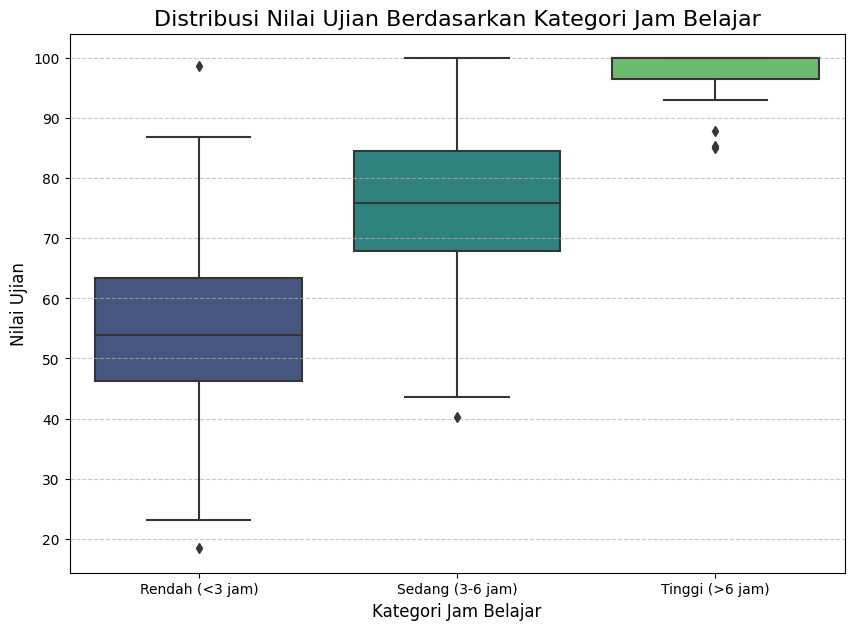

In [35]:
# --- Membuat Kategori untuk 'study_hours_per_day' ---
print('--- Matplotlib & Seaborn Version ---')
study_bins = [df['study_hours_per_day'].min() - 1, 3, 6, df['study_hours_per_day'].max() + 1] 
study_labels = ['Rendah (<3 jam)', 'Sedang (3-6 jam)', 'Tinggi (>6 jam)'] 
df['study_hours_category'] = pd.cut(df['study_hours_per_day'], bins=study_bins, labels=study_labels, ordered=True)

# Visualisasi Box Plot untuk verifikasi pembagian kategori
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df,
    x='study_hours_category',
    y='exam_score',
    palette='viridis',
    order=study_labels
)
plt.title('Distribusi Nilai Ujian Berdasarkan Kategori Jam Belajar', fontsize=16)
plt.xlabel('Kategori Jam Belajar', fontsize=12)
plt.ylabel('Nilai Ujian', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [36]:
print('--- Plotly Version ---')
study_bins = [df['study_hours_per_day'].min() - 1, 3, 6, df['study_hours_per_day'].max() + 1]
study_labels = ['Rendah (<3 jam)', 'Sedang (3-6 jam)', 'Tinggi (>6 jam)']
df['study_hours_category'] = pd.cut(df['study_hours_per_day'], bins=study_bins, labels=study_labels, ordered=True)

# Create the interactive box plot
fig = px.box(
    df,
    x='study_hours_category',
    y='exam_score',
    color='study_hours_category',
    category_orders={'study_hours_category': study_labels},
    title='Distribusi Nilai Ujian Berdasarkan Kategori Jam Belajar'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Kategori Jam Belajar',
    yaxis_title='Nilai Ujian',
    plot_bgcolor='white',
    font=dict(size=12),
    title_font_size=16,
    showlegend=False,  # Remove legend as categories are on x-axis
    hovermode='x unified'  # Show hover info for all boxes at same x-value
)

# Add horizontal grid lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray',
    zeroline=False
)

# Customize box appearance
fig.update_traces(
    marker=dict(size=4, opacity=0.5),  # Outlier points style
    line=dict(width=2),  # Box border thickness
    whiskerwidth=0.5  # Width of whisker lines
)

# Show the plot
fig.show()

--- Plotly Version ---


In [26]:

# --- UJI ANOVA: exam_score berdasarkan study_hours_category ---
print("--- Uji ANOVA: exam_score vs. study_hours_category ---")

# Ekstrak nilai exam_score untuk setiap kategori jam belajar
group_study_rendah = df[df['study_hours_category'] == 'Rendah (<3 jam)']['exam_score'].dropna()
group_study_sedang = df[df['study_hours_category'] == 'Sedang (3-6 jam)']['exam_score'].dropna()
group_study_tinggi = df[df['study_hours_category'] == 'Tinggi (>6 jam)']['exam_score'].dropna()

# Lakukan Uji ANOVA
f_statistic_sh, p_value_sh = f_oneway(group_study_rendah, group_study_sedang, group_study_tinggi)

print(f"F-Statistic: {f_statistic_sh:.3f}")
print(f"P-value: {p_value_sh:.3e}")

if p_value_sh < alpha:
    print(f"P-value ({p_value_sh:.3e}) < alpha ({alpha}), sehingga MENOLAK H0.")
    print("Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori jam belajar.")

    # --- Lakukan Post-Hoc Test (Tukey HSD) jika ANOVA signifikan ---
    print("\n--- Hasil Post-Hoc Test (Tukey HSD) untuk Jam Belajar ---")
    tukey_result_sh = pairwise_tukeyhsd(endog=df['exam_score'], groups=df['study_hours_category'], alpha=alpha)
    print(tukey_result_sh)
    print("Tukey HSD menunjukkan pasangan kategori mana yang berbeda secara signifikan (p-adj < alpha).")

else:
    print(f"P-value ({p_value_sh:.3e}) >= alpha ({alpha}), sehingga GAGAL MENOLAK H0.")
    print("Kesimpulan: Tidak ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori jam belajar.")

print("\n" + "="*80 + "\n") # Pemisah

--- Uji ANOVA: exam_score vs. study_hours_category ---
F-Statistic: 509.168
P-value: 4.289e-153
P-value (4.289e-153) < alpha (0.05), sehingga MENOLAK H0.
Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori jam belajar.

--- Hasil Post-Hoc Test (Tukey HSD) untuk Jam Belajar ---
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------
 Rendah (<3 jam) Sedang (3-6 jam)  21.8939   0.0 20.0299 23.7579   True
 Rendah (<3 jam)  Tinggi (>6 jam)  43.1353   0.0 38.6774 47.5932   True
Sedang (3-6 jam)  Tinggi (>6 jam)  21.2414   0.0 16.8815 25.6012   True
-----------------------------------------------------------------------
Tukey HSD menunjukkan pasangan kategori mana yang berbeda secara signifikan (p-adj < alpha).




* **Uji ANOVA: `exam_score` vs. `study_hours_category`**

* F-Statistic: 509.168

* P-value: 4.289e-153

* P-value (4.289e-153) < alpha (0.05), sehingga MENOLAK H0.

* Kesimpulan: Ada perbedaan signifikan secara statistik dalam rata-rata nilai ujian antar kategori jam belajar.


* **Hasil Post-Hoc Test (Tukey HSD) untuk Jam Belajar**
          
**Multiple Comparison of Means - Tukey HSD, FWER=0.05**

| Group 1          | Group 2         | Mean Diff | p-adj | Lower    | Upper    | Reject |
|------------------|-----------------|-----------|-------|----------|----------|--------|
| Rendah (<3 jam)  | Sedang (3-6 jam) | 21.8939   | 0.0   | 20.0299 | 23.7579 | True   |
| Rendah (<3 jam)  | Tinggi (>6 jam)  | 43.1353   | 0.0   | 38.6774 | 47.5932 | True   |
| Sedang (3-6 jam) | Tinggi (>6 jam)  | 21.2414   | 0.0   | 16.8815 | 25.6012 | True   |

Tukey HSD menunjukkan pasangan kategori mana yang **berbeda secara signifikan** (p-adj < alpha).

## 📈**Pemodelan Regresi**

In [27]:
from sklearn.model_selection import train_test_split # Untuk membagi data
from sklearn.linear_model import LinearRegression    # Model Regresi Linier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Metrik evaluasi

# --- Identifikasi Kolom secara Dinamis ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Pastikan 'exam_score' adalah target dan bukan prediktor numerik
if 'exam_score' in numerical_cols:
    numerical_cols.remove('exam_score')
# Pastikan 'student_id' tidak digunakan sebagai prediktor numerik
if 'student_id' in numerical_cols:
    numerical_cols.remove('student_id')
# Pastikan 'student_id' juga dihapus dari kolom kategorikal jika somehow terdeteksi sebagai object
if 'student_id' in categorical_cols:
    categorical_cols.remove('student_id')


In [28]:
# --- 3. Penanganan Variabel Kategorikal (One-Hot Encoding) ---
# Lakukan One-Hot Encoding pada semua kolom kategorikal yang teridentifikasi
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int) 

# --- 4. Definisikan Fitur (X) dan Target (y) ---
# Variabel target
y = df_encoded['exam_score']

# Variabel prediktor (fitur)
# Kita akan menggunakan semua kolom numerik yang tersisa (setelah mengecualikan id dan target)
# dan semua kolom hasil One-Hot Encoding
all_features = numerical_cols.copy() # Mulai dengan semua kolom numerik yang relevan

# Tambahkan semua kolom dummy yang dibuat oleh get_dummies
# Ini adalah semua kolom yang memiliki nama asli_kategori
for col in df_encoded.columns:
    if any(col.startswith(cat_col + '_') for cat_col in categorical_cols):
        all_features.append(col)

# Pastikan tidak ada duplikasi dan semua fitur yang dipilih benar-benar ada di DataFrame
# Ini penting karena 'all_features' mungkin memiliki kolom yang sudah di-drop karena drop_first=True
X = df_encoded[all_features].copy() # Menggunakan .copy() untuk menghindari SettingWithCopyWarning

print(f"\nVariabel Prediktor (X) yang digunakan: {X.columns.tolist()}")
print(f"Variabel Target (y) yang digunakan: {y.name}")


Variabel Prediktor (X) yang digunakan: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'parental_education_level_Unknown', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_Yes']
Variabel Target (y) yang digunakan: exam_score


In [29]:
# --- 5. Bagi Data menjadi Training dan Testing Set ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran Training Set (X_train): {X_train.shape}")
print(f"Ukuran Testing Set (X_test): {X_test.shape}")


# --- 6. Bangun dan Latih Model Regresi Linier ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Regresi Linier berhasil dilatih.")


# --- 7. Evaluasi Model pada Testing Set ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- Hasil Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.3f}")


Ukuran Training Set (X_train): (800, 19)
Ukuran Testing Set (X_test): (200, 19)

Model Regresi Linier berhasil dilatih.

--- Hasil Evaluasi Model ---
Mean Absolute Error (MAE): 4.19
Root Mean Squared Error (RMSE): 5.15
R-squared (R2): 0.897


#### **Model Regresi Linier berhasil dilatih.**

**Hasil Evaluasi Model**

* Mean Absolute Error (MAE): 4.19
* Root Mean Squared Error (RMSE): 5.15
* R-squared (R2): 0.897


In [30]:
print('--- Plotly version ---')
# Create the scatter plot
fig = px.scatter(
    x=y_test,
    y=y_pred,
    opacity=0.6,
    labels={'x': 'Nilai Ujian Aktual', 'y': 'Nilai Ujian Prediksi'},
    title='Nilai Ujian Aktual vs. Prediksi'
)

# Add perfect prediction line (y=x)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
fig.add_trace(
    go.Scatter(
        x=[min_val, max_val],
        y=[min_val, max_val],
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='Prediksi Sempurna'
    )
)

# Customize layout
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        griddash='dot'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        griddash='dot'
    ),
    title_font_size=20,
    showlegend=True
)

# Add R-squared value annotation (optional)
r2 = r2_score(y_test, y_pred)
fig.add_annotation(
    x=0.05,
    y=0.95,
    xref='paper',
    yref='paper',
    text=f'R² = {r2:.2f}',
    showarrow=False,
    font=dict(size=14)
)

fig.show()

--- Plotly version ---


--- Matplotlib & Seaborn version ---


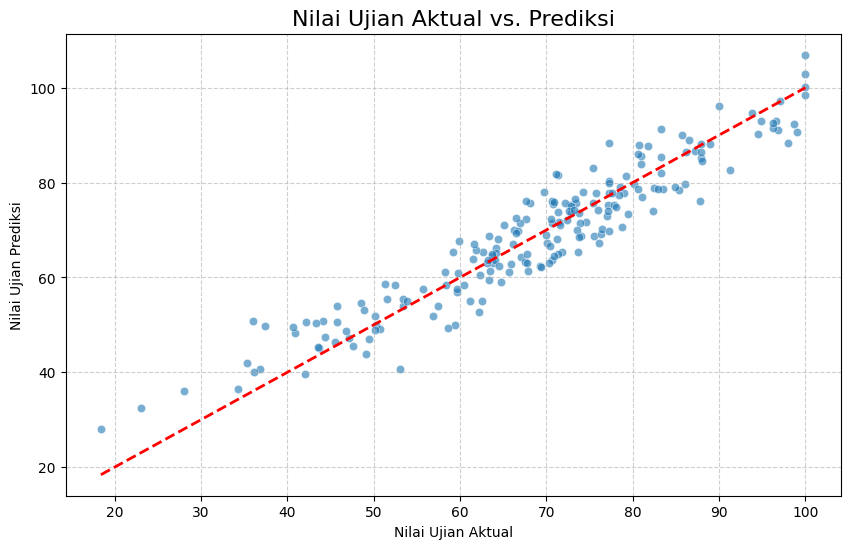

In [37]:
print('--- Matplotlib & Seaborn version ---')
# Visualisasi Hasil Prediksi vs Aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis y=x (prediksi sempurna)
plt.xlabel('Nilai Ujian Aktual')
plt.ylabel('Nilai Ujian Prediksi')
plt.title('Nilai Ujian Aktual vs. Prediksi', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [38]:
# --- 8. Interpretasi Koefisien Model ---
print(f"\n--- Koefisien Model (Interpretasi Pengaruh Variabel) ---")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

print(f"\nIntercept (Konstanta): {model.intercept_:.2f}")


--- Koefisien Model (Interpretasi Pengaruh Variabel) ---
                                 Feature  Coefficient
1                    study_hours_per_day     9.531532
5                            sleep_hours     1.976407
7                   mental_health_rating     1.952856
6                     exercise_frequency     1.319646
9                           gender_Other     0.810709
10                     part_time_job_Yes     0.370921
4                  attendance_percentage     0.144508
8                            gender_Male     0.134296
0                                    age     0.052380
17                 internet_quality_Poor    -0.027938
18     extracurricular_participation_Yes    -0.110945
16                 internet_quality_Good    -0.222769
13  parental_education_level_High School    -0.452531
12                     diet_quality_Poor    -0.546312
14       parental_education_level_Master    -0.698728
15      parental_education_level_Unknown    -0.839483
11                     d

## 📋**Kesimpulan**

1. **Prioritas Kebiasaan Belajar:**

   Jam belajar (`study_hours_per_day`) adalah prediktor positif terkuat dan paling dominan untuk nilai ujian. Peningkatan jam belajar memberikan dampak yang paling besar.
2. **Gaya Hidup Sehat Penting:**

   Tidur yang cukup (`sleep_hours`), kesehatan mental yang baik (`mental_health_rating`), dan frekuensi olahraga (`exercise_frequency`) semuanya menunjukkan dampak positif yang signifikan pada nilai ujian.
3. **Dampak Negatif Hiburan Digital:**

    Penggunaan media sosial (`social_media_hours`) dan Netflix (`netflix_hours`) menunjukkan dampak negatif yang nyata pada nilai ujian, bahkan setelah faktor-faktor lain dikendalikan. Koefisiennya menunjukkan bahwa dampak per jamnya cukup substansial.
4. **Faktor Kontra-Intuitif/Perlu Penyelidikan Lanjut:**

    Koefisien negatif untuk `diet_quality_Good` dan `parental_education_level_Master` adalah insight yang menarik dan mungkin memerlukan penyelidikan lebih lanjut atau diskusi tentang batasan data/model.